# Easy Scalping Strategy Part I

In [121]:
import pandas as pd
# df = pd.read_csv("BTCUSD_Candlestick_15_M_BID_01.10.2019-24.09.2022.csv")
# df.tail()
import yfinance as yf
import pandas_ta as ta
df = yf.download(tickers = 'BTC-USD', start ="2022-06-30", end = "2022-09-25", interval ='15m')
df.head()

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BTC-USD: 15m data not available for startTime=1656572400 and endTime=1664089200. The requested range must be within the last 60 days.


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [70]:
df=df[df['Volume']!=0]
df.isna().sum()
#df.reset_index(drop=True, inplace=True)
df.reset_index(inplace=True)
df.tail()

,Datetime,Open,High,Low,Close,Adj Close,Volume
1743,2022-09-25 03:00:00+00:00,18954.574219,18979.701172,18946.724609,18979.701172,18979.701172,37005312
1744,2022-09-25 03:15:00+00:00,18980.886719,19022.964844,18980.195312,19018.869141,19018.869141,82649088
1745,2022-09-25 03:30:00+00:00,19018.773438,19029.095703,19018.773438,19029.095703,19029.095703,11053056
1746,2022-09-25 05:30:00+00:00,18962.343750,18990.621094,18961.710938,18990.621094,18990.621094,16171008
1747,2022-09-25 06:15:00+00:00,19006.208984,19045.345703,19006.208984,19041.537109,19041.537109,7813120


In [71]:
import pandas_ta as ta
df["EMA50"] = ta.ema(df.Close, length=50)
df["EMA100"] = ta.ema(df.Close, length=100)
df["EMA150"] = ta.ema(df.Close, length=150)

In [72]:
backrollingN = 10
df['slopeEMA50'] = df['EMA50'].diff(periods=1)
df['slopeEMA50'] = df['slopeEMA50'].rolling(window=backrollingN).mean()

df['slopeEMA100'] = df['EMA100'].diff(periods=1)
df['slopeEMA100'] = df['slopeEMA100'].rolling(window=backrollingN).mean()

df['slopeEMA150'] = df['EMA150'].diff(periods=1)
df['slopeEMA150'] = df['slopeEMA150'].rolling(window=backrollingN).mean()

In [73]:
df.tail()

,Datetime,Open,High,Low,Close,Adj Close,Volume,EMA50,EMA100,EMA150,slopeEMA50,slopeEMA100,slopeEMA150
1743,2022-09-25 03:00:00+00:00,18954.574219,18979.701172,18946.724609,18979.701172,18979.701172,37005312,19037.828071,19033.268677,19032.011981,-3.563568,-1.482755,-0.932487
1744,2022-09-25 03:15:00+00:00,18980.886719,19022.964844,18980.195312,19018.869141,19018.869141,82649088,19037.084584,19032.983538,19031.837903,-3.886604,-1.687076,-1.076440
1745,2022-09-25 03:30:00+00:00,19018.773438,19029.095703,19018.773438,19029.095703,19029.095703,11053056,19036.771294,19032.906551,19031.801583,-3.396313,-1.483058,-0.948066
1746,2022-09-25 05:30:00+00:00,18962.343750,18990.621094,18961.710938,18990.621094,18990.621094,16171008,19034.961483,19032.069215,19031.256146,-3.257939,-1.451073,-0.933758
1747,2022-09-25 06:15:00+00:00,19006.208984,19045.345703,19006.208984,19041.537109,19041.537109,7813120,19035.219350,19032.256698,19031.392318,-2.587529,-1.148329,-0.738112


## EMA Signal

In [74]:
import numpy as np
conditions = [
    ( (df['EMA50']<df['EMA100']) & (df['EMA100']<df['EMA150']) & (df['slopeEMA50']<0) & (df['slopeEMA100']<0) & (df['slopeEMA150']<0) ),   #downtrend =1
    ( (df['EMA50']>df['EMA100']) & (df['EMA100']>df['EMA150']) & (df['slopeEMA50']>0) & (df['slopeEMA100']>0) & (df['slopeEMA150']>0) )    #uptrend = 2
           ]
choices = [1, 2]
df['EMAsignal'] = np.select(conditions, choices, default=0)

In [75]:
df.tail()

,Datetime,Open,High,Low,Close,Adj Close,Volume,EMA50,EMA100,EMA150,slopeEMA50,slopeEMA100,slopeEMA150,EMAsignal
1743,2022-09-25 03:00:00+00:00,18954.574219,18979.701172,18946.724609,18979.701172,18979.701172,37005312,19037.828071,19033.268677,19032.011981,-3.563568,-1.482755,-0.932487,0
1744,2022-09-25 03:15:00+00:00,18980.886719,19022.964844,18980.195312,19018.869141,19018.869141,82649088,19037.084584,19032.983538,19031.837903,-3.886604,-1.687076,-1.076440,0
1745,2022-09-25 03:30:00+00:00,19018.773438,19029.095703,19018.773438,19029.095703,19029.095703,11053056,19036.771294,19032.906551,19031.801583,-3.396313,-1.483058,-0.948066,0
1746,2022-09-25 05:30:00+00:00,18962.343750,18990.621094,18961.710938,18990.621094,18990.621094,16171008,19034.961483,19032.069215,19031.256146,-3.257939,-1.451073,-0.933758,0
1747,2022-09-25 06:15:00+00:00,19006.208984,19045.345703,19006.208984,19041.537109,19041.537109,7813120,19035.219350,19032.256698,19031.392318,-2.587529,-1.148329,-0.738112,0


## Total signal

In [76]:
TotSignal = [0] * len(df)
for row in range(0, len(df)):
    TotSignal[row] = 0
    if df.EMAsignal[row]==1 and df.Open[row]>df.EMA50[row] and df.Close[row]<df.EMA50[row]:
        TotSignal[row]=1 #signal to short the ticker
    if df.EMAsignal[row]==2 and df.Open[row]<df.EMA50[row] and df.Close[row]>df.EMA50[row]:
        TotSignal[row]=2 #signal to long the ticker

df['TotSignal']=TotSignal

In [77]:
df.tail()

,Datetime,Open,High,Low,Close,Adj Close,Volume,EMA50,EMA100,EMA150,slopeEMA50,slopeEMA100,slopeEMA150,EMAsignal,TotSignal
1743,2022-09-25 03:00:00+00:00,18954.574219,18979.701172,18946.724609,18979.701172,18979.701172,37005312,19037.828071,19033.268677,19032.011981,-3.563568,-1.482755,-0.932487,0,0
1744,2022-09-25 03:15:00+00:00,18980.886719,19022.964844,18980.195312,19018.869141,19018.869141,82649088,19037.084584,19032.983538,19031.837903,-3.886604,-1.687076,-1.076440,0,0
1745,2022-09-25 03:30:00+00:00,19018.773438,19029.095703,19018.773438,19029.095703,19029.095703,11053056,19036.771294,19032.906551,19031.801583,-3.396313,-1.483058,-0.948066,0,0
1746,2022-09-25 05:30:00+00:00,18962.343750,18990.621094,18961.710938,18990.621094,18990.621094,16171008,19034.961483,19032.069215,19031.256146,-3.257939,-1.451073,-0.933758,0,0
1747,2022-09-25 06:15:00+00:00,19006.208984,19045.345703,19006.208984,19041.537109,19041.537109,7813120,19035.219350,19032.256698,19031.392318,-2.587529,-1.148329,-0.738112,0,0


In [78]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [79]:
df["TotSignal"].value_counts()

0    1568
1      11
2      10
Name: TotSignal, dtype: int64

## Visualizing signals on chart

In [80]:
def pointpos(x):
    if x['TotSignal']==1:
        return x['High']+1e-3
    elif x['TotSignal']==2:
        return x['Low']-1e-3
    else:
        return np.nan

df['pointpos'] = df.apply(lambda row: pointpos(row), axis=1)

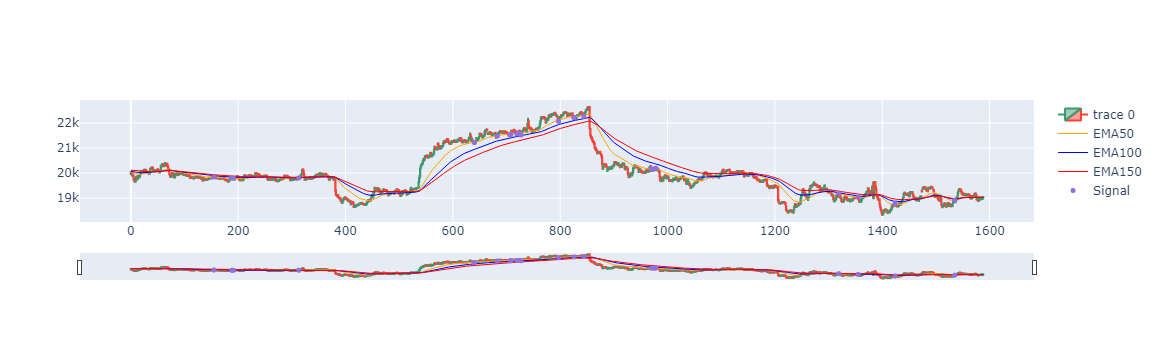

In [92]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
dfpl = df[:]
#100:350
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close']),
                go.Scatter(x=dfpl.index, y=dfpl.EMA50, line=dict(color='orange', width=1), name="EMA50"),
                go.Scatter(x=dfpl.index, y=dfpl.EMA100, line=dict(color='blue', width=1), name="EMA100"),
                go.Scatter(x=dfpl.index, y=dfpl.EMA150, line=dict(color='red', width=1), name="EMA150")])

fig.add_scatter(x=dfpl.index, y=dfpl['pointpos'], mode="markers",
                marker=dict(size=5, color="MediumPurple"),
                name="Signal")
fig.show()

In [93]:
dfpl

,Datetime,Open,High,Low,Close,Adj Close,Volume,EMA50,EMA100,EMA150,slopeEMA50,slopeEMA100,slopeEMA150,EMAsignal,TotSignal,pointpos
0,2022-09-01 12:45:00+00:00,19957.017578,20021.656250,19955.714844,20021.296875,20021.296875,71149568,20047.563482,20079.996811,20115.818982,-1.834593,-1.574299,-1.531910,1,0,NaN
1,2022-09-01 13:00:00+00:00,20020.248047,20023.707031,20002.140625,20006.531250,20006.531250,30005248,20045.954375,20078.542048,20114.371463,-1.531704,-1.426510,-1.433619,1,0,NaN
2,2022-09-01 13:30:00+00:00,19975.914062,20021.265625,19954.107422,20018.525391,20018.525391,66340864,20044.878728,20077.353599,20113.101978,-1.211236,-1.266772,-1.326681,1,0,NaN
3,2022-09-01 14:00:00+00:00,19964.224609,19975.492188,19897.714844,19897.714844,19897.714844,47036416,20039.107595,20073.796396,20110.249169,-1.460420,-1.391498,-1.409313,1,0,NaN
4,2022-09-01 14:15:00+00:00,19896.560547,19927.699219,19855.507812,19924.871094,19924.871094,90574848,20034.627733,20070.847380,20107.793830,-1.658771,-1.493020,-1.476983,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584,2022-09-25 03:00:00+00:00,18954.574219,18979.701172,18946.724609,18979.701172,18979.701172,37005312,19037.828071,19033.268677,19032.011981,-3.563568,-1.482755,-0.932487,0,0,NaN
1585,2022-09-25 03:15:00+00:00,18980.886719,19022.964844,18980.195312,19018.869141,19018.869141,82649088,19037.084584,19032.983538,19031.837903,-3.886604,-1.687076,-1.076440,0,0,NaN
1586,2022-09-25 03:30:00+00:00,19018.773438,19029.095703,19018.773438,19029.095703,19029.095703,11053056,19036.771294,19032.906551,19031.801583,-3.396313,-1.483058,-0.948066,0,0,NaN
1587,2022-09-25 05:30:00+00:00,18962.343750,18990.621094,18961.710938,18990.621094,18990.621094,16171008,19034.961483,19032.069215,19031.256146,-3.257939,-1.451073,-0.933758,0,0,NaN


In [105]:
dfpl.TotSignal.value_counts()

0    1568
1      11
2      10
Name: TotSignal, dtype: int64

## Backtesting Strategy

In [106]:
def SIGNAL():
    return dfpl.TotSignal

In [119]:
from backtesting import Strategy
class MyStrat(Strategy):
    initsize = 0.3
    mysize = initsize
    def init(self):
        super().init()
        self.signal1 = self.I(SIGNAL)

    def next(self):
        super().next()
        
        #if(self.signal1>0 and len(self.trades)==0 and len(self.closed_trades)>0 and self.closed_trades[-1].pl < 0):
        #    self.mysize=self.mysize*2
        #elif len(self.closed_trades)>0 and self.closed_trades[-1].pl > 0:
        #    self.mysize=self.initsize

        if self.signal1==2 and len(self.trades)==0:   
            sl1 = self.data.Close[-1] - 400000e-4
            tp1 = self.data.Close[-1] + 400000e-4
            self.buy(sl=sl1, tp=tp1, size=self.mysize)
        
        elif self.signal1==1 and len(self.trades)==0:         
            sl1 = self.data.Close[-1] + 400000e-4
            tp1 = self.data.Close[-1] - 400000e-4
            self.sell(sl=sl1, tp=tp1, size=self.mysize)

In [120]:
from backtesting import Backtest

bt = Backtest(dfpl, MyStrat, cash=1000000, margin=1/100, commission=.00)
stat = bt.run()
stat

C:\Users\deerr\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.



Start                                     0.0
End                                    1588.0
Duration                               1588.0
Exposure Time [%]                    2.894902
Equity Final [$]               1069929.501953
Equity Peak [$]                1186435.246094
Return [%]                            6.99295
Buy & Hold Return [%]               -4.893588
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                  -22.590666
Avg. Drawdown [%]                   -8.525776
Max. Drawdown Duration                  762.0
Avg. Drawdown Duration                  209.0
# Trades                                 19.0
Win Rate [%]                        57.894737
Best Trade [%]                       0.244126
Worst Trade [%]                     -0.420866
Avg. Trade [%]                    

In [118]:
bt.plot()

Row(id='4209', ...)